In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Competition

This notebook is based on Module 4.1 in *Introduction to Computational Science* by Angela Shiflet and George Shiflet.

For unconstrained growth, the rate of change of a population is proportional to the population.

$$rate_b = \left(\frac{\Delta P}{\Delta t}\right)_b = r_bP \quad \mbox{due to birth}$$

In this case $r_b$ is the growth rate constant, or *birth rate*.

If the population dies at the rate $r_d$, then death causes a change in the population that is negative.

$$rate_d = -r_dP \quad \mbox{due to death}$$

The total rate of change of the population is the sum: $rate_b + rate_d$. 

$$rate = \dot{P}_b + \dot{P}_d = (r_b-r_d)P$$

If the birth rate matches the death rate, then the rate of change in population is zero and the population $P$ is constant.

## Modeling a Population with a Death Rate

Suppose we start with 100 cells of bacteria that grows with a rate $r_b=0.1\ \mathrm{h}^{-1}$. However, due to the temperature of the environment, the cells die at a rate $r_d=0.05\ \mathrm{h}^{-1}$. Plot the population of bacteria both *with* and *without* considering the death rate.

Since we want to plot the population with only birth and also with birth and death, we have to store the population with births only separately from the population with births and deaths.

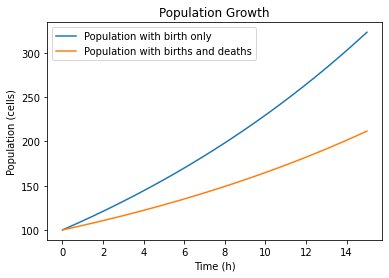

In [3]:
t = 0
dt = 0.005 #h
rb = 0.1 #1/h
rd = 0.05 #1/h
P = 100
Pb = P # population with birth only

tmodel = []
Pbmodel = [] # population with births only
Pmodel = [] # population with births and deaths

while t < 15:
    rateb = rb*P #births only
    Pb = Pb + rateb*dt #births only

    rated = (rb-rd)*P #birth and deaths
    P = P + rated*dt #births and deaths

    t = t + dt
    
    tmodel.append(t)
    Pbmodel.append(Pb)
    Pmodel.append(P)
    
fig = plt.figure()
plt.title("Population Growth")
plt.xlabel("Time (h)")
plt.ylabel("Population (cells)")
plt.plot(tmodel, Pbmodel, label='Population with birth only')
plt.plot(tmodel, Pmodel, label='Population with births and deaths')
plt.legend()
plt.show()

Notice that adding a death rate to our model only decreased the rate of growth of the population. The result is still exponential growth.

### Exercise 1

What if the death rate is equal to the birth rate? Set the death rate equal to the birth rate and run your model.

### Exercise 2

What if the death rate is greater than the birth rate? Set the death rate to be greater than the birth rate and run your model.

## Modeling Competition

When an environment contains two species, each species might compete for the same limited resources (e.g. food), so when one species increases in population, the other one decreases because it has fewer resources. Thus, the population of one species has a negative effect on the rate of change of the other species.

In this model, we will model the populations of whitetip sharks and blacktip sharks competing for the same food sources. The populations of the two species are:

- $P_W$ for the whitetip sharks
- $P_B$ for the blacktip sharks

In this model, for each species, the rate of change of the population due to death depends on the product of the populations, $P_WP_B$ because an increase in each population will result in an increase in the number of deaths of the speacies. Expressed mathematically with the subscript $d$ for death, $W$ for whitetip shark, and $B$ for blacktip shark:

$$rate_{dW} = -r_{dW}P_WP_B \quad \mbox{rate of change of population of whitetip sharks due to death}$$
$$rate_{dB} = -r_{dB}P_WP_B \quad \mbox{rate of change of population of blacktip sharks due to death}$$

The actual death rate coefficient for each species, $r_{dW}$ and $r_{dB}, depends on how well the species competes, with a lower coefficient being more competitive and a higher coefficient being less competitive. Thus, maybe with tongue firmly in cheek, we can call it a *coefficient of losing*.

Each population will still give birth and will increase in population in proportional to the birth rate coefficient for the species and the population of only that species. With the subscript $b$ meaning *birth*, our model is:

$$rate_{bW} = +r_{bW}P_W \quad \mbox{rate of change of population of whitetip sharks due to birth}$$
$$rate_{bB} = +r_{bB}P_B \quad \mbox{rate of change of population of blacktip sharks due to birth}$$

I have included the **+** sign in the expression to emphasize that births result in an increase in the population.

For each species, the rate of change in the population is the sum of the rate of change due to births and rate of change due to deaths.

**Whitetip Sharks**

$$\begin{eqnarray}rate_{W} & = & rate_{bW} + rate_{dW}\\  &=& r_{bW}P_W - r_{dW}P_WP_B \end{eqnarray}$$

**Blacktip Sharks**

$$\begin{eqnarray}rate_{B} & = & rate_{bB} + rate_{dB}\\  &=& r_{bB}P_B - r_{dB}P_WP_B \end{eqnarray}$$

### Initial Conditions and Constants

Here are the initial populations and the birth and death rate coefficients of the whitetip and blacktip shark populations. The unit of time is *month*, and the birth and death rate coefficients are in units of 1/month.

Variable | Initial Value
--- | ---
$P_{B}$ | 15
$r_{bB}$ | 1
$r_{dB}$ | 0.2
--- | --- 
$P_{W}$ | 20
$r_{bW}$ | 1
$r_{dW}$ | 0.27

A program to model the time evolution of the populations is below.

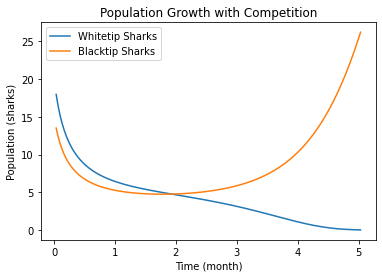

In [4]:
t = 0 
dt = 1/30 # month

P_B = 15
r_bB = 1
r_dB = .2

P_W = 20
r_bW = 1
r_dW = 0.27

tmodel = [] #time model
P_Wmodel = [] #whitetip shark population model
P_Bmodel = [] #blacktip shark population model

while t < 5:
    
    rate_W = r_bW * P_W - r_dW * P_W * P_B # rate of change of whitetip population
    rate_B = r_bB * P_B - r_dB * P_W * P_B # rate of change of blacktip population
    
    P_W = P_W + rate_W*dt
    P_B = P_B + rate_B*dt
    
    t = t + dt

    tmodel.append(t)
    P_Wmodel.append(P_W)
    P_Bmodel.append(P_B)

fig = plt.figure()
plt.title("Population Growth with Competition")
plt.xlabel("Time (month)")
plt.ylabel("Population (sharks)")
plt.plot(tmodel, P_Wmodel, label='Whitetip Sharks')
plt.plot(tmodel, P_Bmodel, label='Blacktip Sharks')
plt.legend()
plt.show()

The whitetip sharks have a higher death rate coefficient (or *coefficient of losing* as I called it). Thus, mathematically, we know they will lose the competition in the long run.

Both populations decrease at first, but at approximately 1.5 months, the blacktip sharks start increasing in population. Once the population of whitetip sharks has decreased to zero (or nearly zero), the blacktip sharks increase exponentially since the birth rate dominates the death rate. There is no longer a competitor (or any other constraint) preventing the blacktip shark's growth.

### Exercise 3

Adjust the values of the initial populations and the birth and death rate coefficients such that each population reaches equilibrium (constant population). When you find a set of initial conditions and coefficients that produces a constant population, record the values you used and record the final population of each species. 

Then, try again to find other sets of initial conditions and coefficients that produces a constant population. In each case, record the final population of each species.

Although you found equilibrium solutions, are these solutions possible? Why might these solutions be completely unphysical (meaning the solution is mathematically correct but is impossible in the real world)?